# Naive Bayes Classification

- Naive Bayes Classifiers is a bouquet of classifiers, based on Bayes Theorem. 
- It is Supervised ML Algorithm. 
- It belongs to the class of Generative Algorithms. 

## Recap Prbobability

- If we flip an unbiased coin what is the chance of getting a head?

- If we roll a dice and expect to get a “4”, what are my odds? 

- Now if I threw a dice and a coin together what is the probability of getting a head and a four?
    - P(A and B) = P(A) * P (B)

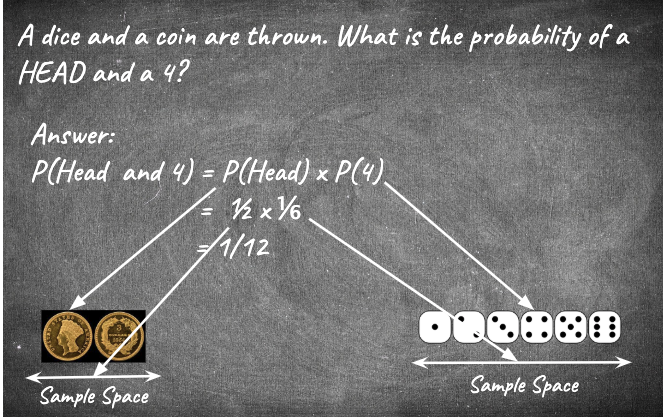

**There are 3 types of probabilities:**
- **joint probability** - When we are studying several events together, in our case - probability of the coin landing on heads AND the dice landing on 4. 
- **conditional probability** -  calculates the probability of heads GIVEN THAT the dice lands on 4. P(H/D4)
- **marginal probability** - the probability of specific outcomes, i.e. probability of JUST the coin or JUST the dice,

## Bayes' Theorem

- Bayes theorem is one of the earliest **probabilistic inference algorithms** developed by Reverend Bayes.

<center><img src="images/bayes_rule.png" width="50%"/></center>

$$P(y \ | \ X) = \frac {P(X \ | \ y) \times P(y)} {P(X)}$$

##### Components
- $P(y \ | \ X)$ **Posterior**: How probrable is our hypothesis (class label- y) given the observed evidence-(X)? (*Note: Not directly computable*)
- $P(X \ | \ y)$ **Likelihood**: How probable is the evidence (X) given that our hypothesis is true (i.e. class label is y)?
- $P(y)$ **Prior**: How probable is the hypothesis *before* observing evidence?
- $P(X)$ **Marginal**: How probable is the new evidence under all possible hypotheses? 


<center><img src="images/bayes-rule2.png" width="85%"/></center>

Allows us to evaluate our hypothesis, given our prior beliefs and new evidence.

## Naive Bayes

- the Bayes theorem calculates the probability of a certain event happening based on the **joint probabilistic distributions** of certain other events. 

Naive Bayes Classifiers rely upon Bayes Theorem that allows you to predict the probability of a `label` if given some set of `features`:

$$P(label | features)$$

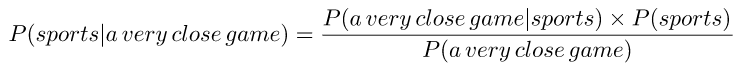

There is the 'Naive' bit of the theorem where it considers each feature to be independent of each other **(Conditional Independence)** which may not always be the case and hence that can affect the final judgement.

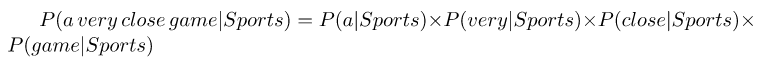

### Naive Bayes is Applicable Where:

1. m << n (# of features) (you have fewer samples than features)
2. m somewhat small __or__ 
3. n quite large
4. streams of input data (online learning)
5. not bounded by memory (data usually stored as in-place tables)
6. Multi-class

### Naive Bayes Classification models are popular machine learning models because they:

1. are fast
2. are simple with few tunable hyperparameters
3. are suitable for datasets with very high dimensions
4. can provide a nice baseline classification to start with before considering more sophisticated models

### Why Text?

Why has Naive Bayes come to be used somewhat exclusively for text (although any labeled data will do).  Well... text data happens to fit very nicely to the bullet points of __Where/When__ to use Naive Bayes.  Due to bag of words featurization of text, the input feature matrix is often very wide (~10,000 - 50,000 columns/dimensions) and can even be greater than the number of data samples (m << n).

Also, we often encounter in the text classification problem the need for multiple classes.  We have the text of articles/documents and would like to classify the article to its appropriate topic/categorization (e.g. sports, politics, arts, etc.).

## Types of Naive Bayes Model

Scikit-learn has a number of Naive Bayes Classifiers depending on what kind of distribution **$P(X \ | \ y)$** or the **Likelihood** follows

Each of the following has slightly different assumptions about the data. For example, the GaussianNB model presumes that the "likelihood of the features is assumed to be Gaussian" (i.e. the likelihood of any given feature falls on a bell curve).

1. Multinomial Bayes
2. Bernoulli Bayes
3. Gaussian Bayes

- **Bernoulli Naive Bayes:** It assumes that all our features are **binary** such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .
<br>

- **Multinomial Naive Bayes:** Its is used when we have **discrete** data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.
<br>

- **Gaussian Naive Bayes:** Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are **continuous**. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.
<br>

## Document Classifier

### The Algorithm

- We are given some documents (X) and 3 tags - sports($y_1$), politics($y_2$) and art($y_3$). 
- For every document, we calculate the probability that the document belongs to each class and chose the class with the highest probability.

To do this, we need to calculate two things:
* **Priors:** The probability that a generic document belongs to each class: *P(c)*
* **Conditional Probabilities:** The probability that each word appears in each class: *P(x|c)*

So how do we actually get all those probabilities? *It's just counting!* We count occurrences in our training set to get approximations of the probabilities.

### Setup

$$D = [(x^{(1)}, c_{1}), (x^{(2)}, c_{2}), \ldots , (x^{(n)}, c_{n})]$$

$$where \quad x^{(i)} \equiv (x_{1}^{(1)}, \ldots, x_{d}^{(1)}) \quad \in \mathbb{R}^{d}$$

$$and$$

$$c \in \{1, \ldots, m\}$$

### The Model

![](images/nb.png)

We will assume a family of $P_{\theta}$ such that:

$$P_{\theta}(x, c) = P_{\theta}(x | c)P_{\theta}(c)$$

And due to the naive assumption of conditional independence we can simplify this equation to:

$$P_{\theta}(x_{1} | c) P_{\theta}(c) \ldots P_{\theta}(x_{d} | c) P_{\theta}(c)$$

Under this model, let us define random variables such that:

$$(X^{(1)}, C_{1}), \ldots, (X^{(n)}, C_{n}) \overset{iid}{\sim} P_{\theta}$$

### Priors

The priors are the likelihood of each class. Based on the distribution of classes in our training set, we can assign a probability to each class:

![priors](images/priors.png)

Take a very simple example where 3 classes: sports, politics, arts. There are 3 sports articles, 4 politics articles and 1 arts articles. This is 8 articles total. Here are our priors:

![priors examples](images/priors_example.png)

### Conditional Probability Table

- The first step is building the *Conditional Probability Table (CPT)*. 
- We would like to get, for every word, the count of the number of times it appears in each class. 
- We are calculating the probability that a random word chosen from an article of class *c* is word *x*.

![conditional probability](images/conditional_prob.png)

Again, let's take our example. Let's look at the word "ball". Here are the occurrences in each of the 8 documents. We also need the word count of the documents.

| Article    | Occurrences of "ball" | Total # of words |
| :--------- | --------------------: | ---------------: |
| Sports 1   |                     5 |              101 |
| Sports 2   |                     7 |               93 |
| Sports 3   |                     0 |              122 |
| Politics 1 |                     0 |               39 |
| Politics 2 |                     0 |               81 |
| Politics 3 |                     0 |              142 |
| Politics 4 |                     0 |               77 |
| Arts 1     |                     2 |              198 |

Here are the values in the CPT table for the word "ball". We will do these calculations for all the words that appeared in the training documents.

![cpt example](images/cpt_example.png)

### Maximum Likelihood Estimation

- We need to pull this all together to use these calculations to make a prediction. 
- Here, *X* is the content of an article and *x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>, ...* are the words that make up the article.

![mle](images/mle.png)

We assign the article that has the largest probability. Note that since we made our incredibly naive assumption, these "probabilities" will not add to 1.

In our example, if we had the very short article of `The Giants beat the Nationals`, we would do the following calculations:

![mle example](images/mle_example.png)

- The first probability is the prior, and the remaining come from the Conditional Probability Table. 
- We make the same calculation for each of the 3 classes and choose the class with the biggest probability.

### Zero Probabilities

If a word has never before appeared in a document of a certain class, the probability will be 0. Since we are multiplying the probability, the whole probability becomes 0! We basically lose all information.

In the above example, since "ball" never appears in a politics article in the training set, if it appeared in a new article, we would say that there was a 0% chance that that was a politics article. But that's too harsh!

How can we fix this?

The simplest option is to replace these zeros with a really small value, like 0.00000001.
The better option is *Laplace Smoothing*.

### Laplace Smoothing

Laplace Smoothing is assuming that every word has been seen by every article class one extra time. One way of thinking of it is that we add a new document to every class which has every word in it exactly once. This will guarantee that no value will be 0. So we modify our calculations of the probabilities slightly.

Here's our new conditional probability with Laplace smoothing.

![conditional probability with smoothing](images/conditional_prob_smoothing.png)

The standard is to use 1 as the smoothing constant, but in theory we could assume every word appeared half a time or something like this. This gives us a *smoothing constant*, which is a parameter we can tune:

![conditional probability with smoothing](images/conditional_prob_smoothing_constant.png)

### Log Likelihood

These probability values are going to get *really small*. Theoretically, this is not an issue, but when a computer makes the computation, we run the risk of *numerical underflow*. To keep our values bigger, we take the log. Recall that this is true: `log(ab) = log(a) + log(b)`

The MLE is written:

![log mle](images/log_mle.png)

Recall that if `a > b` `log(a) > log(b)` so we can still find the maximum of the log likelihoods.

### Constraints of Service-wide Spam detection

But why was spam email the "[killer app](http://en.wikipedia.org/wiki/Killer_application)" for Naive Bayes?

Let us think about the problem of spam... If you are Google, you have millions of users who receive emails daily.  But the pattern of email is quite particular as compared to other datasets: a user receives a single email at a time and before you (Google) pass the email to their inbox you need to determine at that immediate moment whether or not it is spam.  So why not another classifier?

To be a successful feature of an email client, spam detection needs to:

1. Have __low False Negatives__ (you don't want your boss's email to go in your spam folder)
2. Be fast to predict (to deliver emails in a timely manner)
3. Train fast on all of your data... or incrementally update (the stream of emails is not stopping anytime soon)

With these constraints in mind, what would happen with another model (such as kNN) in the use case of spam detection.

## Summary of Naive Bayes Algorithm

* **Training**: Calculate the priors and Conditional Probability Table
* **Predict**: Calculate the MLE for the new article for each label and pick the max

### Example Application

Let's pretend we have an email with three words: "Send money now." We want to classify that email as ham or spam.

We'll use Naive Bayes classification:

$$P(spam | \text{send money now}) = \frac {P(\text{send money now} | spam) \times P(spam)} {P(\text{send money now})}$$

By assuming that the features (the words) are conditionally independent, we can simplify the likelihood function:

$$P(spam | \text{send money now}) \approx \frac {P(\text{send} | spam) \times P(\text{money} | spam) \times P(\text{now} | spam) \times P(spam)} {P(\text{send money now})}$$

We could calculate all of the values in the numerator by examining a corpus of spam:

$$P(spam | \text{send money now}) \approx \frac {0.2 \times 0.1 \times 0.1 \times 0.9} {P(\text{send money now})} = \frac {0.0018} {P(\text{send money now})}$$

We could repeat this process to calculate the probability that the email is ham:

$$P(ham | \text{send money now}) \approx \frac {0.05 \times 0.01 \times 0.1 \times 0.1} {P(\text{send money now})} = \frac {0.000005} {P(\text{send money now})}$$

All we care about is whether spam or ham has the higher probability, and so we predict that the email is spam.

What have we learned from this exercise?

- The "naive" assumption of Naive Bayes (that the features are conditionally independent) is critical to making these calculations simple.
- The normalization constant (the denominator) can be ignored since it's the same for all classes.
- The prior probability is basically irrelevant once you have a lot of features.
- The Naive Bayes classifier can handle a lot of irrelevant features.

## Generative vs Discriminative Algorithms

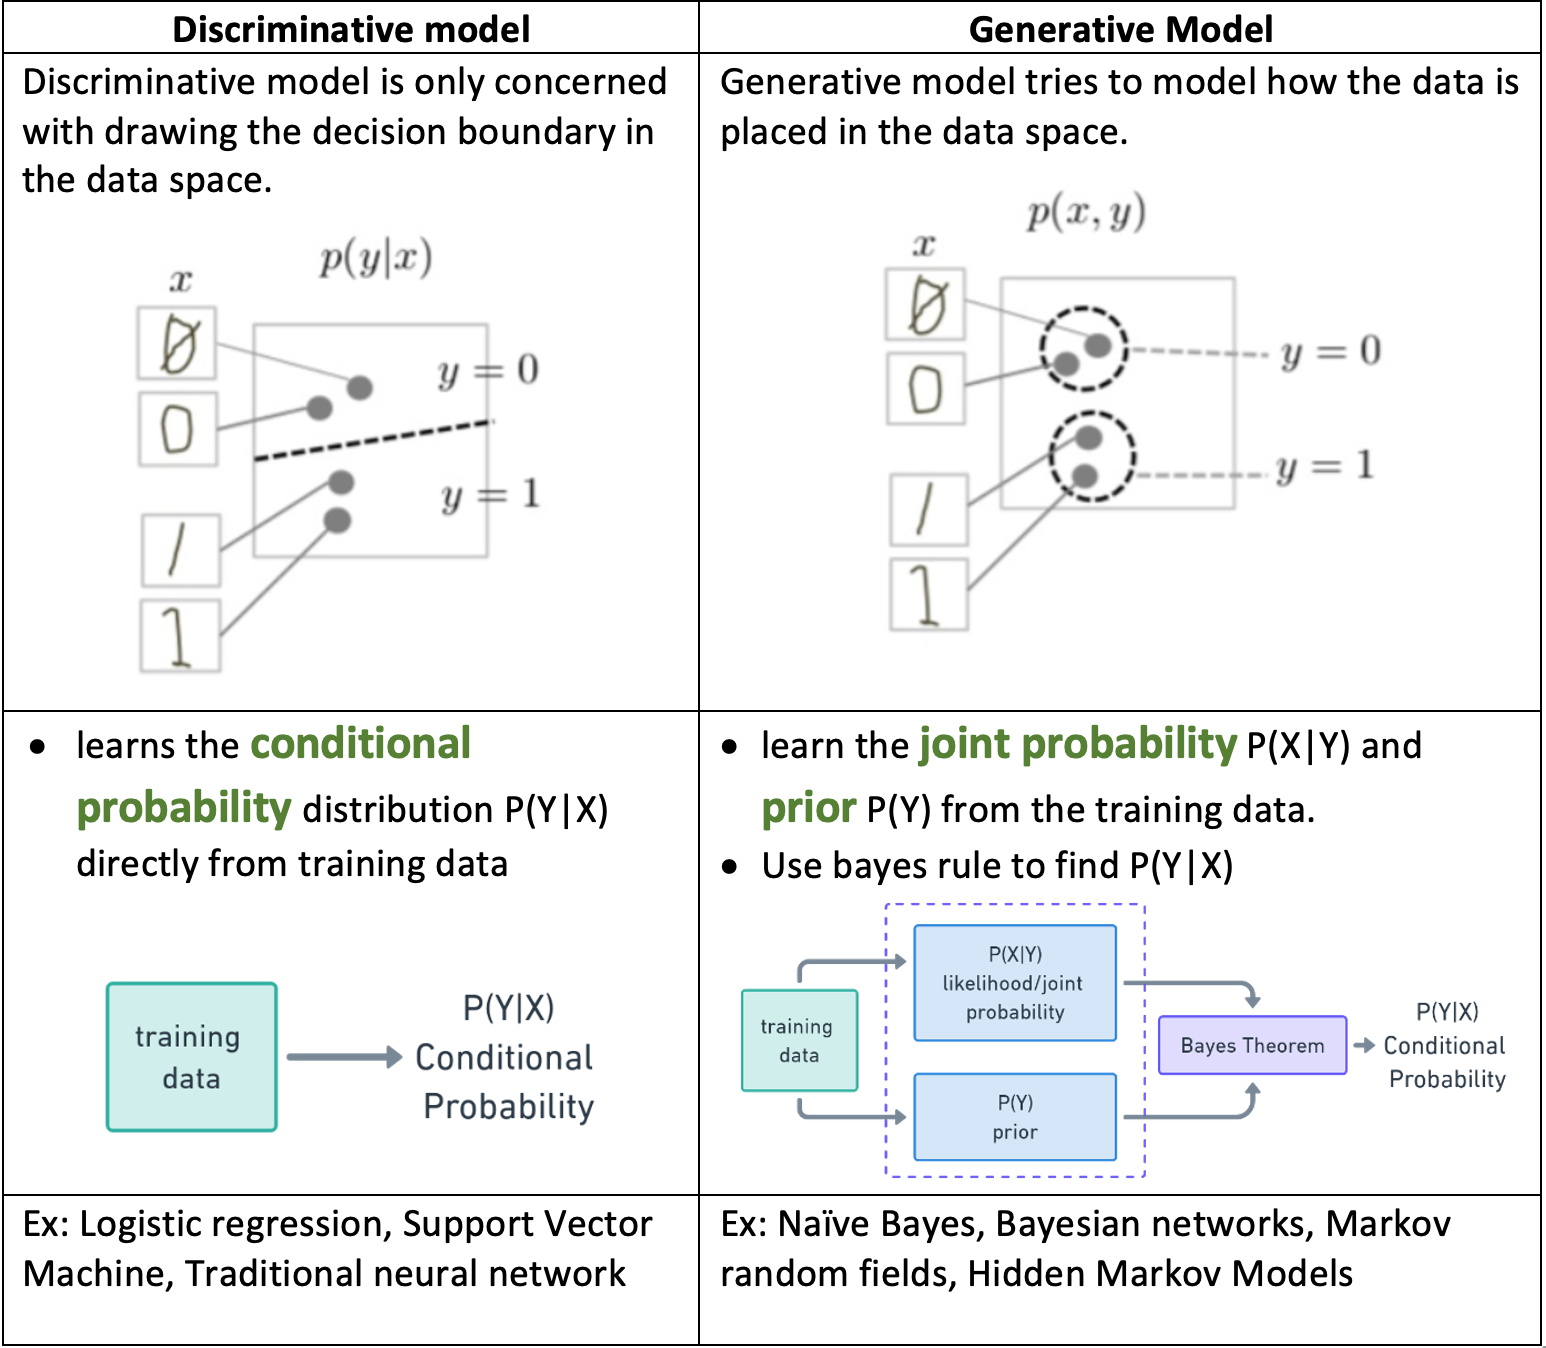

## MLE vs MAP

# References

https://en.wikipedia.org/wiki/Naive_Bayes_classifier  
https://www.youtube.com/watch?v=M59h7CFUwPU - Udacity video on NB  
http://www.cs.columbia.edu/~mcollins/em.pdf - Naive Bayes and EM method for building models without labels  